In [87]:
!python3 -m pip install concepts tabulate pygraphviz
from IPython.display import Latex
from concepts import Context
from tabulate import tabulate
import pygraphviz as pgv
from fractions import Fraction
import copy

You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


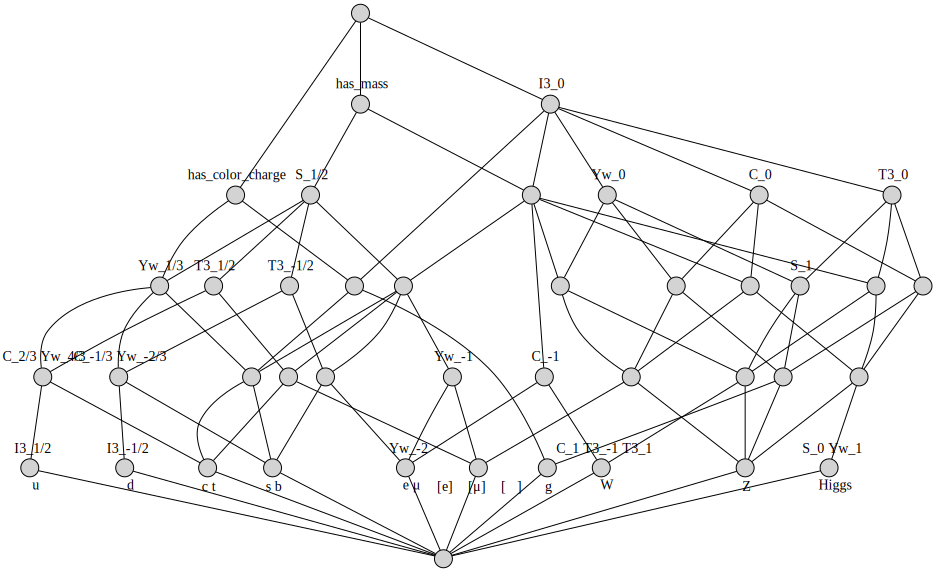

In [89]:
def create_context(data, headers=None):
    free_id = 0
    all_attributes = dict()
    all_attributes_values = set()
    if headers is not None:
        for (row_index, (obj, attrs)) in enumerate(data):
            out_attrs = []
            for (index, attr) in enumerate(attrs):
                if isinstance(attr, bool):
                    if attr:
                        out_attrs.append(headers[index])
                elif isinstance(attr, list):
                    for attr_val in attr:
                        out_attrs.append(f'{headers[index]}_{str(attr_val)}')
                else:
                    out_attrs.append(f'{headers[index]}_{str(attr)}')
            data[row_index] = (obj, out_attrs)
    for (row_index, _) in enumerate(data):
        data[row_index] = (data[row_index][0], list(filter(lambda x: x is not None, data[row_index][1])))
    for (_, attrs) in data:
        for attr in attrs:
            if attr not in all_attributes:
                all_attributes[attr] = free_id
                free_id = free_id + 1
    attr_count = len(all_attributes)
    table = []
    for (obj, attrs) in data:
        row = [obj] + ([''] * attr_count)
        for attr in attrs:
            row[all_attributes[attr]+1] = 'X'
        table.append(row)
            
    def replace_all_chars(text, replacement):
        return str(replacement) * len(text)

    table_rows = tabulate(table, ["", *all_attributes.keys()], tablefmt="github").split('\n')
    header_tokens = table_rows[0].split('|')
    table_rows = "\n".join(map(lambda x: x[1:], ['|'.join([' '+replace_all_chars(header_tokens[1], ' '), *header_tokens[2:]]),*table_rows[2:]]))
    return Context.fromstring(table_rows)

DATA = [
    ['has_mass', 'has_color_charge', 'C', 'S', 'T3', 'I3', 'Yw'],
    [
        ('u',   [True, True, Fraction(2, 3), Fraction(1,2), Fraction(1,2), Fraction(1,2), [Fraction(1,3), Fraction(4,3)]]),
        ('c',   [True, True, Fraction(2,3), Fraction(1,2), Fraction(1,2), 0, [Fraction(1,3), Fraction(4,3)]]),
        ('t',   [True, True, Fraction(2,3), Fraction(1,2), Fraction(1,2), 0, [Fraction(1,3), Fraction(4,3)]]),
        ('g',   [False, True, 0, 1, 0, 0, 0]),
        ('d',   [True, True, Fraction(-1,3), Fraction(1,2), Fraction(-1,2), Fraction(-1,2), [Fraction(1,3), Fraction(-2,3)]]),
        ('s',   [True, True, Fraction(-1,3), Fraction(1,2), Fraction(-1,2), 0, [Fraction(1,3), Fraction(-2,3)]]),
        ('b',   [True, True, Fraction(-1,3), Fraction(1,2), Fraction(-1,2), 0, [Fraction(1,3), Fraction(-2,3)]]),
        ('𝛾',   [False, False, 0, 1, 0, 0, 0]),
        ('e',   [True, False, -1, Fraction(1,2), Fraction(-1,2), 0, [-1, -2]]),
        ('μ',   [True, False, -1, Fraction(1,2), Fraction(-1,2), 0, [-1, -2]]),
        ('𝜏',   [True, False, -1, Fraction(1,2), Fraction(-1,2), 0, [-1, -2]]),
        ('Z',   [True, False, 0, 1, 0, 0, 0]),
        ('𝜈[e]', [True, False, 0, Fraction(1,2), Fraction(1,2), 0, [-1, 0]]),
        ('𝜈[μ]', [True, False, 0, Fraction(1,2), Fraction(1,2), 0, [-1, 0]]),
        ('𝜈[𝜏]', [True, False, 0, Fraction(1,2), Fraction(1,2), 0, [-1, 0]]),
        ('W',   [True, False, [1, -1], 1, [-1, 0, 1], 0, 0]),
        ('Higgs', [True, False, 0, 0, 0, 0, 1]),
    ]
]

ctx = create_context(copy.deepcopy(DATA[1]), headers=DATA[0])

ctx.lattice.graphviz()

In [92]:
from IPython.display import HTML, display
import tabulate
display(HTML(tabulate.tabulate([['particle', *DATA[0]], *map(lambda x: [x[0], *x[1]], DATA[1])], tablefmt='html')))

particle,has_mass,has_color_charge,C,S,T3,I3,Yw
u,True,True,2/3,1/2,1/2,1/2,"[Fraction(1, 3), Fraction(4, 3)]"
c,True,True,2/3,1/2,1/2,0,"[Fraction(1, 3), Fraction(4, 3)]"
t,True,True,2/3,1/2,1/2,0,"[Fraction(1, 3), Fraction(4, 3)]"
g,False,True,0,1,0,0,0
d,True,True,-1/3,1/2,-1/2,-1/2,"[Fraction(1, 3), Fraction(-2, 3)]"
s,True,True,-1/3,1/2,-1/2,0,"[Fraction(1, 3), Fraction(-2, 3)]"
b,True,True,-1/3,1/2,-1/2,0,"[Fraction(1, 3), Fraction(-2, 3)]"
𝛾,False,False,0,1,0,0,0
e,True,False,-1,1/2,-1/2,0,"[-1, -2]"
μ,True,False,-1,1/2,-1/2,0,"[-1, -2]"
